<div align="center">

# National Tsing Hua University

### Fall 2023

#### 11210IPT 553000

#### Deep Learning in Biomedical Optical Imaging

## HW2 Task2 (Refer to lab 3): Hyperparameter Tuning

</div>


In [1]:
# Download dataset
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/pneumonia.npy

--2023-10-16 11:59:13--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65536128 (62M) [application/octet-stream]
Saving to: ‘normal.npy’

normal.npy          100%[===================>]  62.50M   327MB/s    in 0.2s    

2023-10-16 11:59:18 (327 MB/s) - ‘normal.npy’ saved [65536128/65536128]

--2023-10-16 11:59:18--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/train/pneumonia.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

## A. Data Loading and Preprocessing

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

import numpy as np

# Load Dataset
abnormal_scans = np.load('pneumonia.npy')
normal_scans = np.load('normal.npy')

print(f'Shape of abnormal_scans: {abnormal_scans.shape}')
print(f'Shape of normal_scans: {normal_scans.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.

abnormal_labels = np.ones((abnormal_scans.shape[0],))
normal_labels = np.zeros((normal_scans.shape[0],))

split_point = 800

x_train = np.concatenate((abnormal_scans[:split_point], normal_scans[:split_point]), axis=0)
y_train = np.concatenate((abnormal_labels[:split_point], normal_labels[:split_point]), axis=0)
x_val = np.concatenate((abnormal_scans[split_point:], normal_scans[split_point:]), axis=0)
y_val = np.concatenate((abnormal_labels[split_point:], normal_labels[split_point:]), axis=0)

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
print(f'X_train: max value is {x_train.max().item()}, min value is {x_train.min().item()}, data type is {x_train.dtype}.')

Shape of abnormal_scans: (1000, 256, 256)
Shape of normal_scans: (1000, 256, 256)
Number of samples in train and validation are 1600 and 400.
X_train: max value is 255.0, min value is 0.0, data type is torch.float32.


## B. Defining Neural Networks in PyTorch

In [3]:
import torch.nn as nn

#Model in Lab 2
# model = nn.Sequential(
#     nn.Flatten(),
#     nn.Linear(256*256*1, 256),
#     nn.ReLU(),
#     nn.Linear(256, 1)
# ).cuda()

model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 1)
).cuda()

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=65536, out_features=64, bias=True)
  (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=64, out_features=64, bias=True)
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=64, out_features=64, bias=True)
  (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=64, out_features=1, bias=True)
)


## C. Training the Neural Network
>Use For loop to turing the Hyerparameters and plot the results in the same figure.

Shape of abnormal_scans: (1000, 256, 256)
Shape of normal_scans: (1000, 256, 256)
Number of samples in train and validation are 1600 and 400.
X_train: max value is 255.0, min value is 0.0, data type is torch.float32.
Hyperparameter_ 1
Epoch 1/30, Train Loss: 0.5559, Train Accuracy: 73.94%, Val Loss: 0.4027, Val Accuracy: 89.75%
model_classification_1.pth
Epoch 2/30, Train Loss: 0.3645, Train Accuracy: 85.88%, Val Loss: 0.3025, Val Accuracy: 93.50%
model_classification_1.pth
Epoch 3/30, Train Loss: 0.2586, Train Accuracy: 91.12%, Val Loss: 0.2483, Val Accuracy: 91.50%
model_classification_1.pth
Epoch 4/30, Train Loss: 0.2048, Train Accuracy: 93.12%, Val Loss: 0.1879, Val Accuracy: 94.50%
model_classification_1.pth
Epoch 5/30, Train Loss: 0.1868, Train Accuracy: 93.56%, Val Loss: 0.3235, Val Accuracy: 87.00%
Epoch 6/30, Train Loss: 0.1800, Train Accuracy: 94.06%, Val Loss: 0.1714, Val Accuracy: 93.00%
model_classification_1.pth
Epoch 7/30, Train Loss: 0.1636, Train Accuracy: 94.06%, Val 

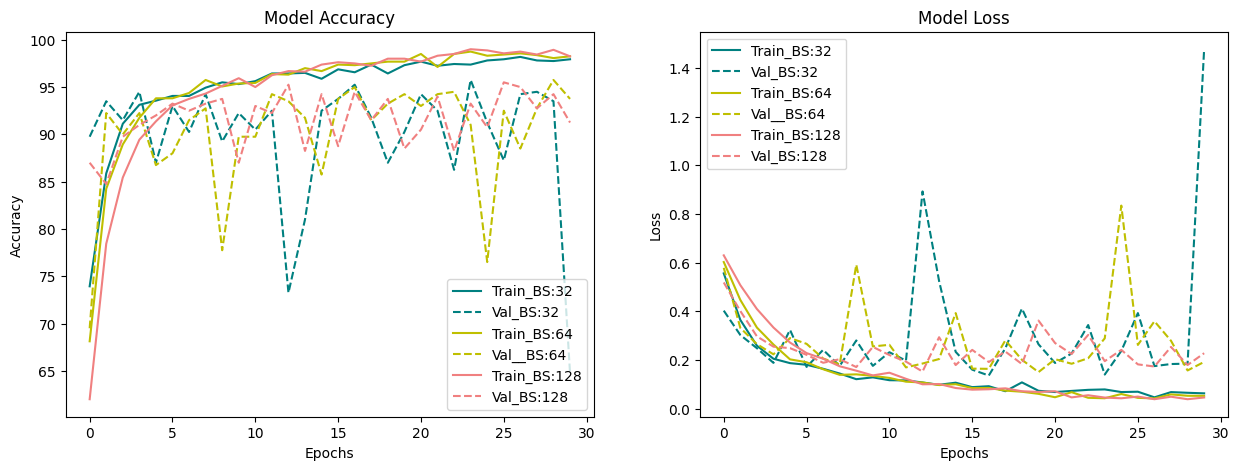

In [7]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR, ExponentialLR, MultiStepLR
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.title('Comparison of Batch size')


colors = ['teal','y','lightcoral']
batch_sizes = [32, 64,128]

  # Use for loop to turn the Hyerparameters and plot the results in the same figure.
for i in range(3): # to change Batch size

  # Load Dataset
  abnormal_scans = np.load('pneumonia.npy')
  normal_scans = np.load('normal.npy')

  print(f'Shape of abnormal_scans: {abnormal_scans.shape}')
  print(f'Shape of normal_scans: {normal_scans.shape}')

  # For the data having presence of pneumonia assign 1, for the normal ones assign 0.

  abnormal_labels = np.ones((abnormal_scans.shape[0],))
  normal_labels = np.zeros((normal_scans.shape[0],))

  split_point = 800

  x_train = np.concatenate((abnormal_scans[:split_point], normal_scans[:split_point]), axis=0)
  y_train = np.concatenate((abnormal_labels[:split_point], normal_labels[:split_point]), axis=0)
  x_val = np.concatenate((abnormal_scans[split_point:], normal_scans[split_point:]), axis=0)
  y_val = np.concatenate((abnormal_labels[split_point:], normal_labels[split_point:]), axis=0)

  # Convert to PyTorch tensors
  x_train = torch.from_numpy(x_train).float()
  y_train = torch.from_numpy(y_train).long()
  x_val = torch.from_numpy(x_val).float()
  y_val = torch.from_numpy(y_val).long()

  # Create datasets
  train_dataset = TensorDataset(x_train, y_train)
  val_dataset = TensorDataset(x_val, y_val)

  # Create dataloaders
  train_loader = DataLoader(train_dataset, batch_size = batch_sizes[i], shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size = batch_sizes[i], shuffle=False)

  print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')
  print(f'X_train: max value is {x_train.max().item()}, min value is {x_train.min().item()}, data type is {x_train.dtype}.')


  model = nn.Sequential(
      nn.Flatten(),

      nn.Linear(256*256*1, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Dropout(0.5),

      nn.Linear(64, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Dropout(0.5),

      nn.Linear(64, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Dropout(0.5),

      nn.Linear(64, 1)
  ).cuda()

  # Fix parameters
  epochs = 30 # 1個epoch 看過整個資料一次
  best_val_loss = float('inf')

  # Criterion and Optimizer
  criterion = nn.BCEWithLogitsLoss()
  optimizer = optim.Adam(model.parameters(), lr=1e-3)


  lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)

  '''For turning learning rate schelder
  if i == 0:
    lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
  if i == 1:
    lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
  if i == 2:
    lr_scheduler = ExponentialLR(optimizer, gamma=0.9)

  #turning_parameters = [lr_scheduler_1,lr_scheduler_2,lr_scheduler_3]
  '''





  print('Hyperparameter_',i+1)
  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  #lr_scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader)*epochs, eta_min=0)
  #lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
  #lr_scheduler = turning_parameters[i]

  for epoch in range(epochs):

      # Training
      model.train()
      total_loss = 0.0
      train_correct = 0
      total_train_samples = 0

      for images, labels in train_loader:
          images = images.cuda()
          images = images / 255.
          labels = labels.cuda()
          optimizer.zero_grad()
          outputs = model(images)

          labels = labels.float().unsqueeze(1)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

          train_predicted = torch.sigmoid(outputs) > 0.5
          train_correct += (train_predicted.float() == labels).sum().item()
          total_train_samples += labels.size(0)

      avg_train_loss = total_loss / len(train_loader)
      train_accuracy = 100. * train_correct / total_train_samples

      # Validation
      model.eval()
      total_val_loss = 0.0
      correct = 0
      total = 0
      with torch.no_grad():
          for images, labels in val_loader:
              images = images.cuda()
              images = images / 255.
              labels = labels.cuda()
              outputs = model(images)

              labels = labels.float().unsqueeze(1)

              loss = criterion(outputs, labels)
              total_val_loss += loss.item()

              predicted = torch.sigmoid(outputs) > 0.5
              correct += (predicted.float() == labels).sum().item()
              total += labels.size(0)

      avg_val_loss = total_val_loss / len(val_loader)
      val_accuracy = 100. * correct / total

      print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

      # Learning rate update
      lr_scheduler.step()

      # Checkpoint # 這裡會一直被取代 只要有更好的
      if avg_val_loss < best_val_loss:
          best_val_loss = avg_val_loss
          torch.save(model.state_dict(), 'model_classification_'+str(i+1)+'.pth')
          print('model_classification_'+str(i+1)+'.pth')

      # Store performance
      train_losses.append(avg_train_loss)
      train_accuracies.append(train_accuracy)
      val_losses.append(avg_val_loss)
      val_accuracies.append(val_accuracy)


  # Plotting training and validation accuracy
  ax[0].plot(train_accuracies,linestyle = '-',color = colors[i]) #,color = colors[i]
  ax[0].plot(val_accuracies,linestyle = '--',color = colors[i]) #,color = colors[i]


  # Plotting training and validation loss
  ax[1].plot(train_losses,linestyle = '-',color = colors[i]) #,color = colors[i]
  ax[1].plot(val_losses,linestyle = '--',color = colors[i]) #,color = colors[i]

#ax[0].set_ylim(90,100)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train_BS:'+str(batch_sizes[0]), 'Val_BS:'+str(batch_sizes[0]),'Train_BS:'+str(batch_sizes[1]), 'Val__BS:'+str(batch_sizes[1]),'Train_BS:'+str(batch_sizes[2]), 'Val_BS:'+str(batch_sizes[2])])

#ax[1].set_ylim(0,0.8)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train_BS:'+str(batch_sizes[0]), 'Val_BS:'+str(batch_sizes[0]),'Train_BS:'+str(batch_sizes[1]), 'Val__BS:'+str(batch_sizes[1]),'Train_BS:'+str(batch_sizes[2]), 'Val_BS:'+str(batch_sizes[2])])


# Model Evaluation with Test Set

Step 0: Download test dataset

In [14]:
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
!wget https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy

--2023-10-16 12:09:28--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_normal.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13107328 (12M) [application/octet-stream]
Saving to: ‘test_normal.npy.1’

test_normal.npy.1   100%[===================>]  12.50M  --.-KB/s    in 0.04s   

2023-10-16 12:09:28 (336 MB/s) - ‘test_normal.npy.1’ saved [13107328/13107328]

--2023-10-16 12:09:28--  https://raw.githubusercontent.com/TacoXDD/homeworks/master/dataset/test/test_pneumonia.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

Step 1: Prepare your test dataset

In [15]:
import numpy as np

test_abnormal = np.load('test_pneumonia.npy')
test_normal = np.load('test_normal.npy')

print(f'Shape of test_abnormal: {test_abnormal.shape}')
print(f'Shape of test_normal: {test_normal.shape}')

# For the data having presence of pneumonia assign 1, for the normal ones assign 0.
test_abnormal_labels = np.ones((test_abnormal.shape[0],))
test_normal_labels = np.zeros((test_normal.shape[0],))

x_test = np.concatenate((test_abnormal, test_normal), axis=0)
y_test = np.concatenate((test_abnormal_labels, test_normal_labels), axis=0)

print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of test_abnormal: (200, 256, 256)
Shape of test_normal: (200, 256, 256)
Shape of x_test: (400, 256, 256)
Shape of y_test: (400,)


Step 2: Load Test Images into PyTorch DataLoader (5 pts)

In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

# Convert to PyTorch tensors
# 以下 x 為資料 y為資料對應的標籤；資料使用float，標籤使用long(int)
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

# Combine the images and labels into a dataset
test_dataset = TensorDataset(x_test, y_test)

# Create a dataloader to load data in batches. Set batch size to 32.
# Create dataloaders #把data 分成 mini batch 分次load
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Step 3: Prepare Your Trained Model

In [17]:
# Declare the model architecture (lab3 D.)
# model = nn.Sequential(
#     nn.Flatten(),#把圖片展成1D 65536
#     nn.Linear(256*256*1, 256), #??
#     nn.ReLU(), #
#     nn.Linear(256, 1) # Map回Class ,1: about loss, BCE cross entropy; 作業裡的 CE entropy 要用2
# ).cuda()
model = nn.Sequential(
    nn.Flatten(),

    nn.Linear(256*256*1, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(64, 1)
).cuda()


Step 4: Perform Inference and Calculate the Accuracy (10 pts)

In [18]:
# From Lab2

# Lab2 是隨機抽img 測試
# 在此直接測試整個Test data

for i in range(3):
  # Load the trained weights (Loading the Best Model?)
  model.load_state_dict(torch.load('model_classification_'+str(i+1)+'.pth'))#.pth pytorch weight 會用的

  # Set the model to evaluation mode
  model.eval()


  test_correct = 0
  test_total = 0

  with torch.no_grad():
      for images, labels in test_loader:

          images = images.cuda()
          images = images / 255.

          labels = labels.cuda() # for BCE

          outputs = model(images)

          labels_float = labels.float().unsqueeze(1)  # Convert labels to float and match shape with outputs for BCE
          predicted = torch.sigmoid(outputs) > 0.5

          test_correct += (predicted.float() == labels_float).sum().item()
          test_total += labels.size(0)

  train_accuracy = 100. * test_correct / test_total
  print(str(i+1)+'_Parameter')
  print(f'Test accuracy is {train_accuracy}%.')

1_Parameter
Test accuracy is 73.75%.
2_Parameter
Test accuracy is 74.25%.
3_Parameter
Test accuracy is 75.75%.
